<a href="https://colab.research.google.com/github/alfanugraha/mlzoomcamp-homework/blob/master/09_serverless_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

This work is based on the previous [one](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2025/08-deep-learning/homework.md). Need to download the data here:

- https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle/hair_classifier_v1.onnx.data
- https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle/hair_classifier_v1.onnx

In [ ]:
!pip install keras-image-helper

In [ ]:
!pip install tf2onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.0 MB/s eta 0:00:00


In [28]:
!pip install pillow

In [64]:
import numpy as np
import onnxruntime as ort

In [20]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img

def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

In [17]:
onnx_model_path = "/content/hair_classifier_v1.onnx"
session = ort.InferenceSession(onnx_model_path, providers=["CPUExecutionProvider"])

## Q1. Output node name

In [22]:
inputs = session.get_inputs()
input_name = inputs[0].name
input_name

'input'

In [24]:
outputs = session.get_outputs()
output_name = outputs[0].name
outputs[0]

In [27]:
output_name

'output'

## Q2. Image size

In [32]:
img_url = "https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg"
img = download_image(img_url)

x = np.array(img)
x.shape

(1024, 1024, 3)

The real image size is 1024x1024

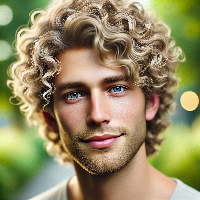

In [55]:
img_rz = prepare_image(img, (200, 200))
img_rz

In [60]:
img_rz.size

(200, 200)

Then the target should be 200x200

## Q3. First R value after pre-processing

In [61]:
x = np.array(img_rz)

x = x / 255.0 # scale to 0-1 (like ToTensor does)

# normalize with ImageNet mean and std
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
x = (x - mean) / std

x[0, 0, 0]

np.float64(-1.0732939463995204)

The value of first pixel in the R channel is `-1.073`

## Q4. Model output

In [63]:
# from (Height, Width, Channel) to (C, H, W) for PyTorch format
# (200, 200, 3) -> (3, 200, 200)
x = np.transpose(x, (2, 0, 1))

# For batch dimension: (C, H, W) -> (1, C, H, W)
# (3, 200, 200) -> (1, 3, 200, 200)
x = np.expand_dims(x, axis=0)

# Convert to float32
x = x.astype(np.float32)

In [66]:
result = session.run([output_name], {input_name: x})
result[0]

array([[0.09156641]], dtype=float32)

## Q5. Docker image size

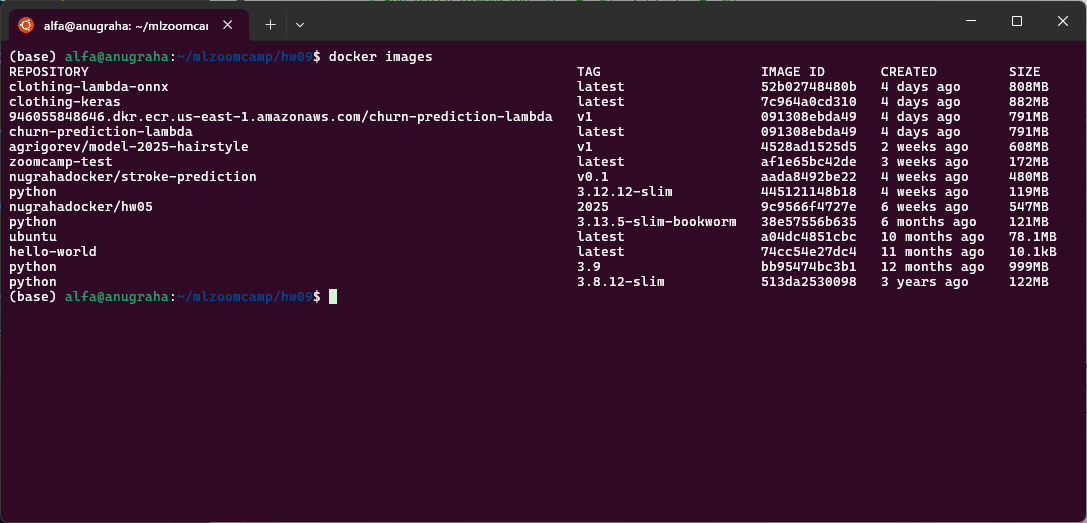

608MB

## Q6. Model output docker

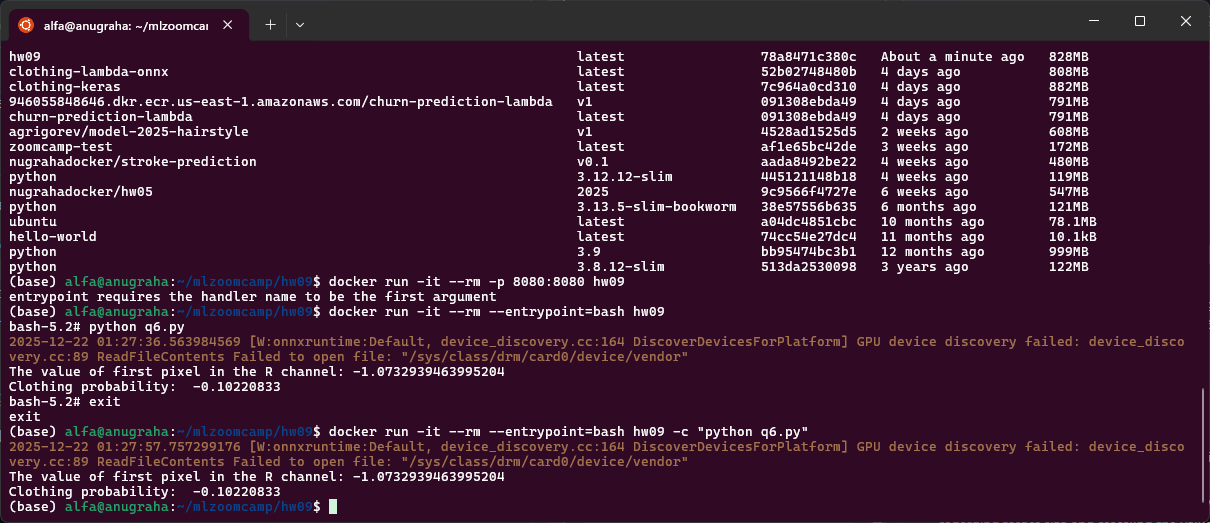

The answer is `-0.1022`